### Q1

In [9]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import math

# Read in data without headers
data = np.genfromtxt('CleanClusters.csv', delimiter=',')[1:,1:]

def TCE_calc(data, k):
    x = data[:,0]
    y = data[:,1]

    # Create KMeans object with random initialization
    kmeans = KMeans(n_clusters=k, init='random')

    # Fit the KMeans model to the data
    kmeans.fit(data)

    # Get the cluster assignments for each data point
    labels = kmeans.labels_

    # Find distances
    distances = kmeans.transform(data)
    distances = np.column_stack((distances, labels))
    newcol = []
    for i in range(distances.shape[0]):
        newcol.append(distances[i,labels[i]]**2)
    label_distances = pd.DataFrame(np.column_stack((labels, newcol)))
    label_distances.columns = ['Cluster', 'Distance sqr']
    cluster_sum = label_distances.groupby('Cluster')['Distance sqr'].sum()
    tce = math.sqrt(label_distances['Distance sqr'].sum())

    return tce

print(TCE_calc(data=data, k=3))

88.361377811456


/Users/reese/PycharmProjects/Advanced_Predictive_Models/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Q2

In [10]:
print(TCE_calc(data=data, k=5))

44.590106215863585


/Users/reese/PycharmProjects/Advanced_Predictive_Models/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Q3

In [11]:
print(TCE_calc(data=data, k=10))

36.69056052292011


/Users/reese/PycharmProjects/Advanced_Predictive_Models/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Users/reese/PycharmProjects/Advanced_Predictive_Models/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


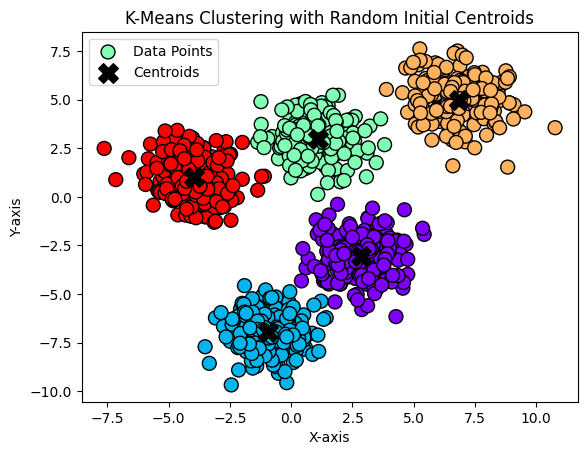

In [13]:
def plot_kmeans(data, k):
    x = data[:,0]
    y = data[:,1]

    # Create KMeans object with random initialization
    kmeans = KMeans(n_clusters=k, init='random')

    # Fit the KMeans model to the data
    kmeans.fit(data)

    # Get the final centroid positions
    centroids = kmeans.cluster_centers_

    # Get the cluster assignments for each data point
    labels = kmeans.labels_

    # Find distances
    distances = kmeans.transform(data)
    distances = np.column_stack((distances, labels))
    newcol = []
    for i in range(distances.shape[0]):
        newcol.append(distances[i,labels[i]])
    for i, v in enumerate(newcol):
        newcol[i] = v**2
    label_distances = pd.DataFrame(np.column_stack((labels, newcol)))
    label_distances.columns = ['Cluster', 'Distance sqr']
    cluster_sum = label_distances.groupby('Cluster')['Distance sqr'].sum()
    tce = math.sqrt(label_distances['Distance sqr'].sum())

    # Plot
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', edgecolor='k', s=100, label='Data Points')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('K-Means Clustering with Random Initial Centroids')
    plt.legend()
    plt.show()

plot_kmeans(data, 5)